In [1]:
# first load necessary dependencies
import numpy as np
import cv2
COLOR_BayerBG2BGR = 46
COLOR_BayerGB2BGR = 47
COLOR_BayerRG2BGR = 48
COLOR_BayerGR2BGR = 49
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from PIL import Image
import matplotlib
from cycler import cycler

from scipy.stats import ttest_ind


In [2]:
# FIRST DEFINE THE GENERAL PATH FROM WHERE DATA IS READ OUT:



In [26]:
# FOR 09_07_3 ANALYSIS!!!

general_path = '/home/niggi/Desktop/luminascense_log_analysis/09_07_3/'
# ASSUMPTION: all files named: PRENAME + ITERATION + NAME (PRENAME AND NAME STAY CONSTANT,...)

pre_name = '09_07_3_'
iteration = ['1_','2_','3_','4_','5_']
name = ['dark','induced','induced1_2','induced1_4','uninduced','water']
# PLOT NAMES MIGHT BE USED IF YOU WANT TO HAVE A ADIFFERENT DESCRIPTIONS FOR THE LOGS!!
plot_name = ['dark','induced','induced 1:2','induced1_4','uninduced','water']
num_iterations = len(iteration)
num_settings = len(name)
num_files = num_iterations*num_settings
#print num_iterations
des_save_name = '09_07_3_'

In [2]:
# FOR 09_20 ANALYSIS

general_path = '/home/niggi/Desktop/luminascense_log_analysis/09_20/'
# ASSUMPTION: all files named: PRENAME + ITERATION + NAME (PRENAME AND NAME STAY CONSTANT,...)

pre_name = '09_20_'
iteration = ['1_','2_','3_']
name = ['nothing','LB','Buffer_wo_L','Buffer_w_L','LB_buff_wo_L','LB_buff_w_L','unin_LB','unin_buff_wo_L', \
       'unin_buff_w_L','in_LB','in_buff_wo_L','in_buff_w_L','in_1_1','in_1_3']
# PLOT NAMES MIGHT BE USED IF YOU WANT TO HAVE A ADIFFERENT DESCRIPTIONS FOR THE LOGS!!
plot_name = ['nothing','LB media','Buffer without luciferase','Buffer with luciferase','LB with buffer \n without luciferase','LB with buffer \n with luciferase','uninduced cells in LB','uninduced cells in buffer \n without luciferase', \
       'uninduced cells in buffer \n with luciferase','induced cells in LB','induced cells in buffer \n without luciferase','induced cells in buffer \n with luciferase','1xinduced cells, 1x uninduced cells \n in buffer with luciferase ','1xinduced cells, 3x uninduced cells \n in buffer with luciferase ']
num_iterations = len(iteration)
num_settings = len(name)
num_files = num_iterations*num_settings
#print num_iterations
des_save_name = '09_20_'

In [31]:
# FOR 09_24
general_path = '/home/niggi/Desktop/luminascense_log_analysis/09_24/'
# ASSUMPTION: all files named: PRENAME + ITERATION + NAME (PRENAME AND NAME STAY CONSTANT,...)

pre_name = '09_24_'
iteration = ['1_','2_','3_','4_','5_']
name = ['nothing','unin_buff_wL','in_buff_wL','in_1_1_buff_wL','in_1_5_buff_wL','in_1_10_buff_wL','in_1_20_buff_wL']
# PLOT NAMES MIGHT BE USED IF YOU WANT TO HAVE A ADIFFERENT DESCRIPTIONS FOR THE LOGS!!
plot_name =['nothing','unin_buff_wL','in_buff_wL','in_1_1_buff_wL','in_1_5_buff_wL','in_1_10_buff_wL','in_1_20_buff_wL']
num_iterations = len(iteration)
num_settings = len(name)
num_files = num_iterations*num_settings
#print num_iterations
des_save_name = '09_24_'

In [3]:
# READ THE BINNED FILES INTO ARRAY: data_arr_txt(num_files,num_measurements,num_bins)
# important: num_file = setting (+iteration)...
     
#first: try to find out the structure of the files!!
file_name = general_path+'raw_txt/'+pre_name+iteration[0]+name[0]+'.txt'
fh = open(file_name, 'r') 
data = fh.read()

#Hier gehe über alle measurement -> ANZAHL "MEASUREMENTS" in file_info[0] steht die "binsize"
file_info = data.split("\n")
bin_size_string = file_info[0]
num_measurements = len(file_info)-2 #-2 da erste line und letzte line (siehe jeweiliges dokument!!!)
print num_measurements

#determine num of bins
file_info[1] = file_info[1].split(",")
num_bins = len(file_info[1])
#print num_bins

#pre allocate array which is needed later
data_arr_txt = np.zeros((num_files,num_measurements,num_bins))

# second: REALLY read in all the files!!!

#ERST HIER: gehe über ALLE FILES!!!
for i in range(0,num_settings):
    for l in range(0,num_iterations):
        file_name = general_path+'raw_txt/'+pre_name+iteration[l]+name[i]+'.txt'
        fh = open(file_name, 'r') 
        data = fh.read()
        # LINEWISE NOW
        #print len(avail_files)
        a = data.split("\n")
        #Hier gehe über alle measurements!!!
        for j in range(1,num_measurements+1):
            a[j] = a[j].split(",")
            # Durch alle Zahlenfelder durch!!!
            for k in range(0,num_bins-1): #letzter Wert wird nie erreicht,...
                data_arr_txt[i*num_iterations+l][j-1][k] = int(a[j][k])

            data_arr_txt[i*num_iterations+l][j-1][num_bins-1] = int(a[j][num_bins-1][:-1])

6


In [4]:
# THE FOLLOWING CODE SNIPPLET IS TO READ OUT "RAW" data files,... into pic_arr and pic_arr_int32
# ATTENTIKON: num_measurements = num_pics
file_name = general_path+'raw_bin/'+pre_name+iteration[0]+name[0]+'_raw.bin'

num_pics = 0
f = file(file_name,"rb")
while True:
    try:
        aa = np.load(f)
        [height,width,channels] = aa.shape
        num_pics = num_pics+1
        #aa = cv2.cvtColor(aa,COLOR_BayerRG2BGR)
        #plt.imshow(aa)
        #plt.show()
    except:
        break                
f.close()

#print num_pics
#print [height,width,channels]
pic_arr = np.zeros((num_files,num_pics,height*width),dtype=np.uint8)

# second: REALLY read in all the files!!!
#ERST HIER: gehe über ALLE FILES!!!
for i in range(0,num_settings):
    for l in range(0,num_iterations):
        file_name = general_path+'raw_bin/'+pre_name+iteration[l]+name[i]+'_raw.bin'
        f = file(file_name,"rb")
        #Hier gehe über alle Bilder!!!
        for j in range(0,num_pics):
            aa = np.load(f)
            pic_arr[i*num_iterations+l][j][:]=((aa.reshape(height*width)))
        f.close()
    
#convert to int 32 such that 0-1=-1 and not 0 as with uint
pic_arr_int32 = np.array((pic_arr),dtype=np.int32)  


In [6]:
# JUST A DUMMY LINE BECAUSE HERE NOW ALL THE PLOTTING STUFF BEGINS:

In [7]:
# USING THE BINNED TXT DATA:

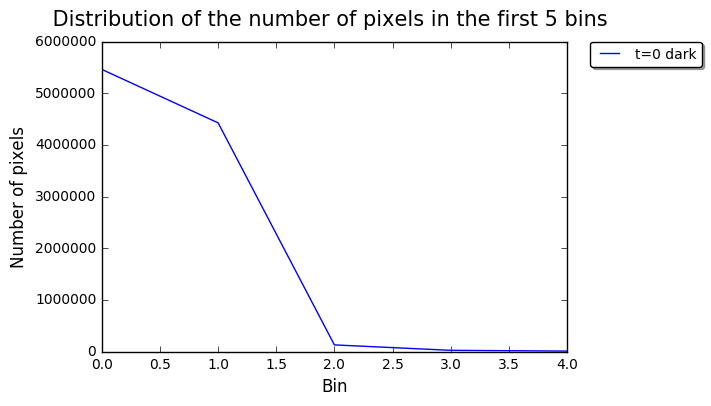

[1 2 3 4 5]
5472324.0


/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


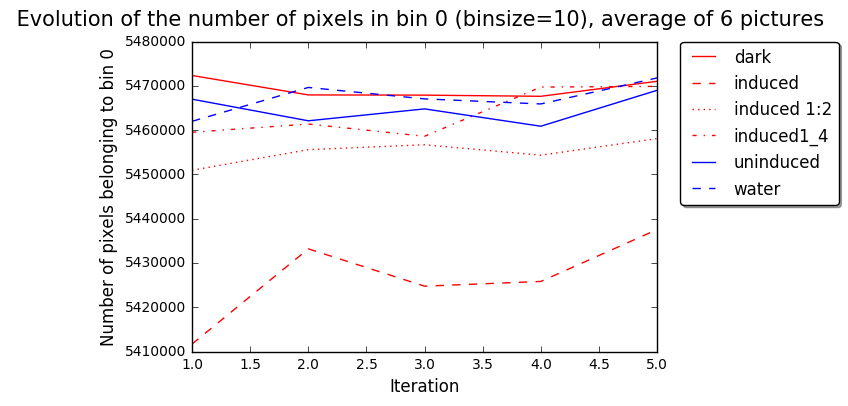

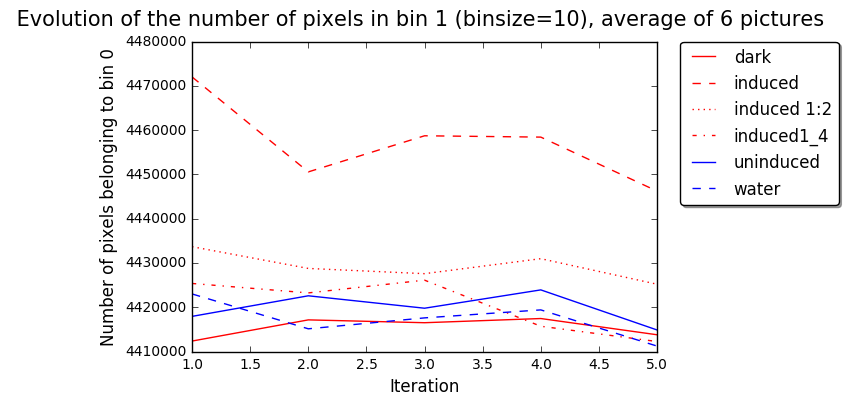

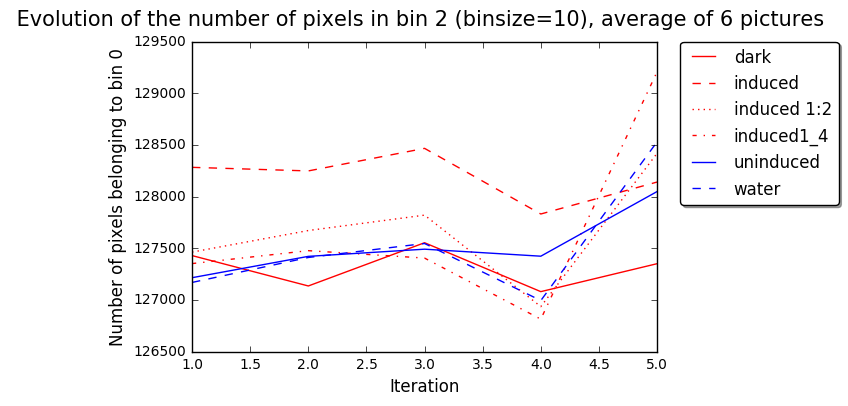

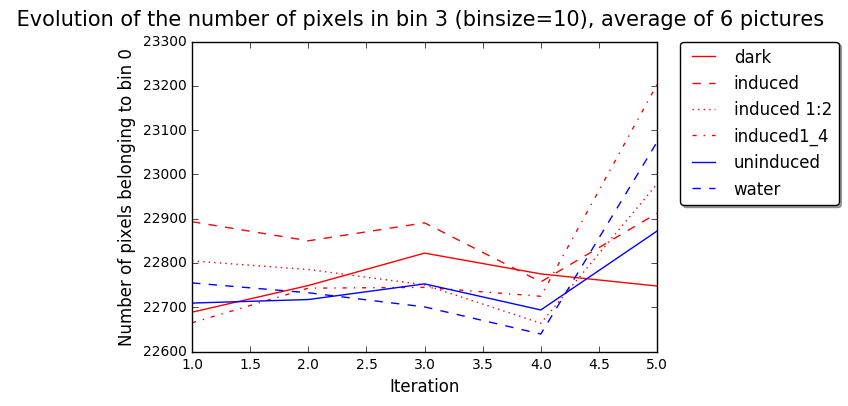

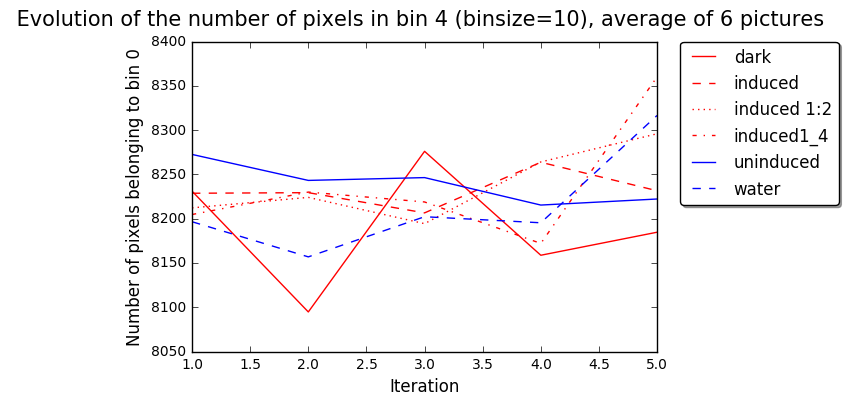

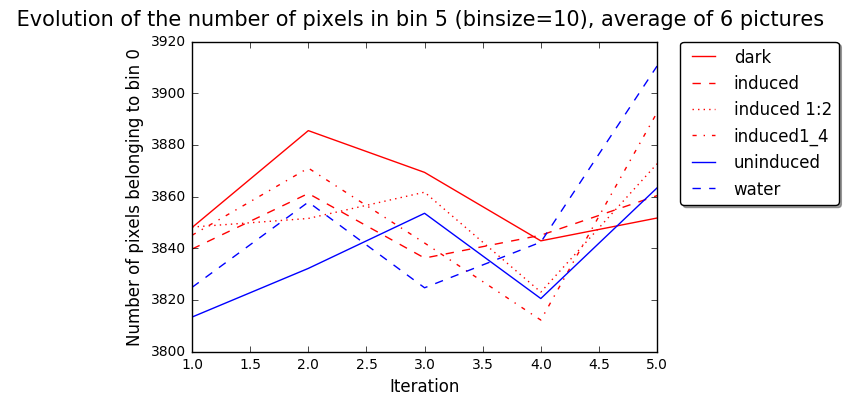

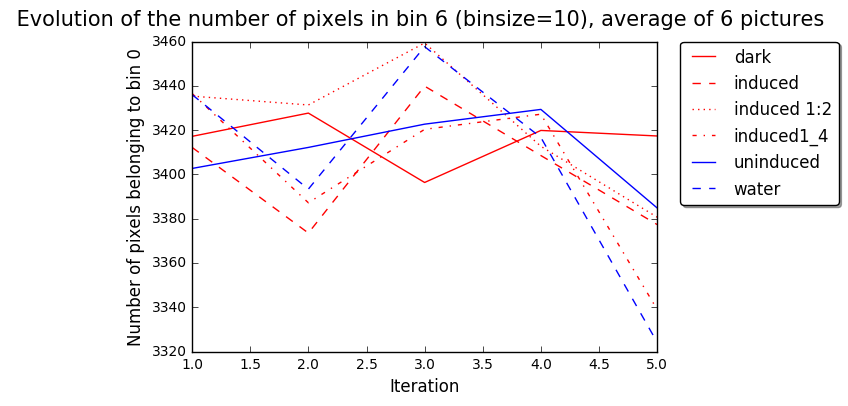

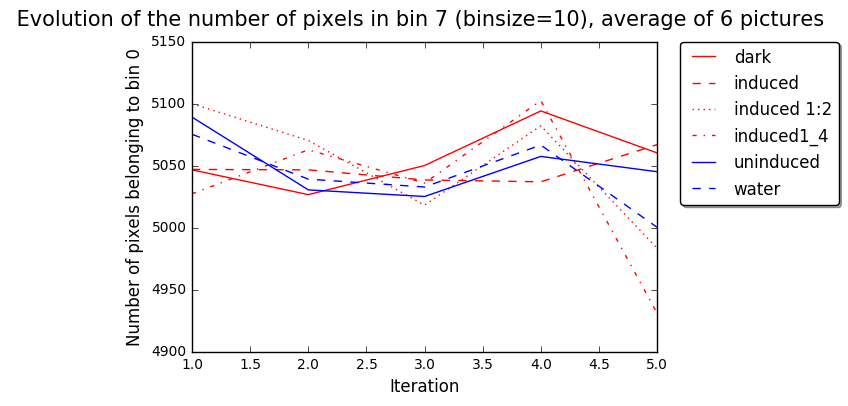

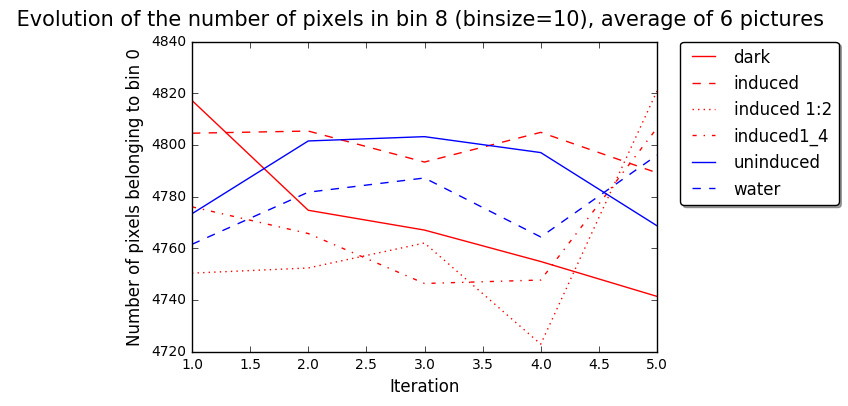

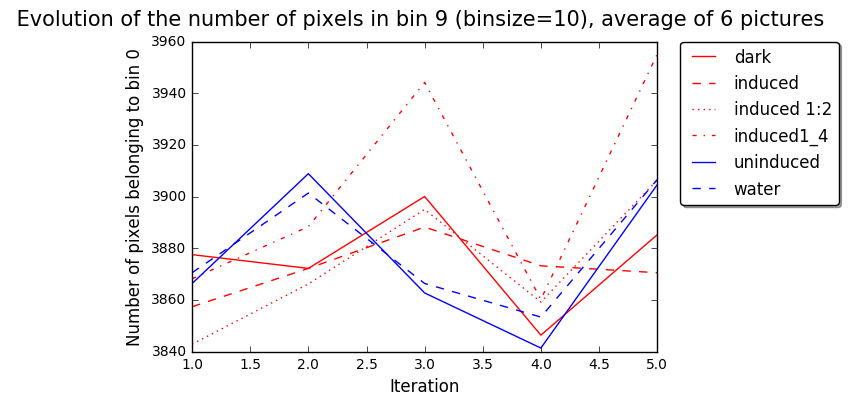

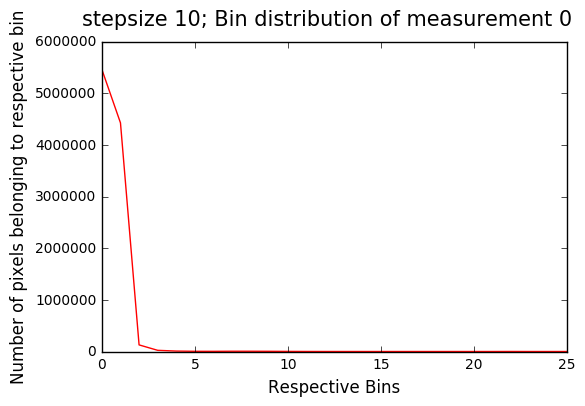

In [10]:
pp = PdfPages(des_save_name+'_txt_file_analysis'+'.pdf')
f1 = plt.figure()
plt.plot(data_arr_txt[0,0,0:5],label=('t=0 '+ plot_name[0]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})

f1.suptitle(' Distribution of the number of pixels in the first 5 bins',fontsize=15)
plt.xlabel('Bin', fontsize=12)
plt.ylabel('Number of pixels',fontsize=12)

plt.show()
pp.savefig(f1,bbox_inches='tight')

# PLOT THE RESULT OF THE MEAN,...
time = np.linspace(1,num_iterations,num_iterations,dtype=np.int8)
print time
to_use = np.zeros(num_iterations)

for i in range(0,10):
    #i = 0 # is the bin number
    f2 = plt.figure()
    
    for j in range(0,num_settings):
        for l in range(0,num_iterations):

            to_use[l] = np.mean(data_arr_txt[j*num_iterations+l,:,i])    
        plt.rc('axes', prop_cycle=(cycler('color', ['r', 'r', 'r', 'r','b','b','b','b','g','g','g','g','y','y','y','y','k','k','k','k','c','c','c','c','m','m','m','m']) +
                           cycler('linestyle', ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.'])))
        plt.plot(time[:],to_use[:],label=plot_name[j])
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 12})

        plt.suptitle(' Evolution of the number of pixels in bin ' + str(i) + ' (binsize=10), average of ' + str(num_measurements) + ' pictures',fontsize=15)
        plt.xlabel('Iteration', fontsize=12)
        plt.ylabel('Number of pixels belonging to bin 0',fontsize=12)
    pp.savefig(f2,bbox_inches='tight')    


print np.mean(data_arr_txt[0,:,0])



f4 = plt.figure()
plt.plot(data_arr_txt[0,0,:])
plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,prop={'size': 10})

f4.suptitle(bin_size_string + ' Bin distribution of measurement 0',fontsize=15)
plt.xlabel('Respective Bins', fontsize=12)
plt.ylabel('Number of pixels belonging to respective bin',fontsize=12)

plt.show()
pp.savefig(f4,bbox_inches='tight')

# SAVING!!


pp.close()

In [11]:
# USING THE RAW DATA:

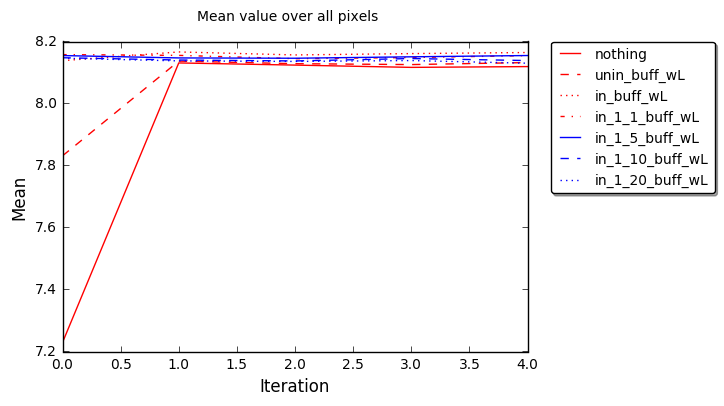

In [12]:
#NEW GRAPH -> PRINT MEAN OF PICTURES!!!
f14 = plt.figure()
means_arr = np.zeros((num_files/num_iterations,num_iterations))
for i in range(0,num_files/num_iterations):
    for k in range(0,num_iterations):
        #print i*num_iterations+k
        means_arr[i,k] = np.mean(pic_arr_int32[i*num_iterations+k])
        #print np.mean(pic_arr_int32[i*num_iterations+k])
    plt.plot((means_arr[i,:]),label=plot_name[i])
        


f14.suptitle('Mean value over all pixels')

plt.ylabel('Mean',fontsize=12)
plt.xlabel('Iteration',fontsize=12)

#plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,prop={'size': 10})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})

plt.show()

pp = PdfPages(des_save_name+'_MeanValAllPixels.pdf')
pp.savefig(f14,bbox_inches='tight')
pp.close()
   

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.]


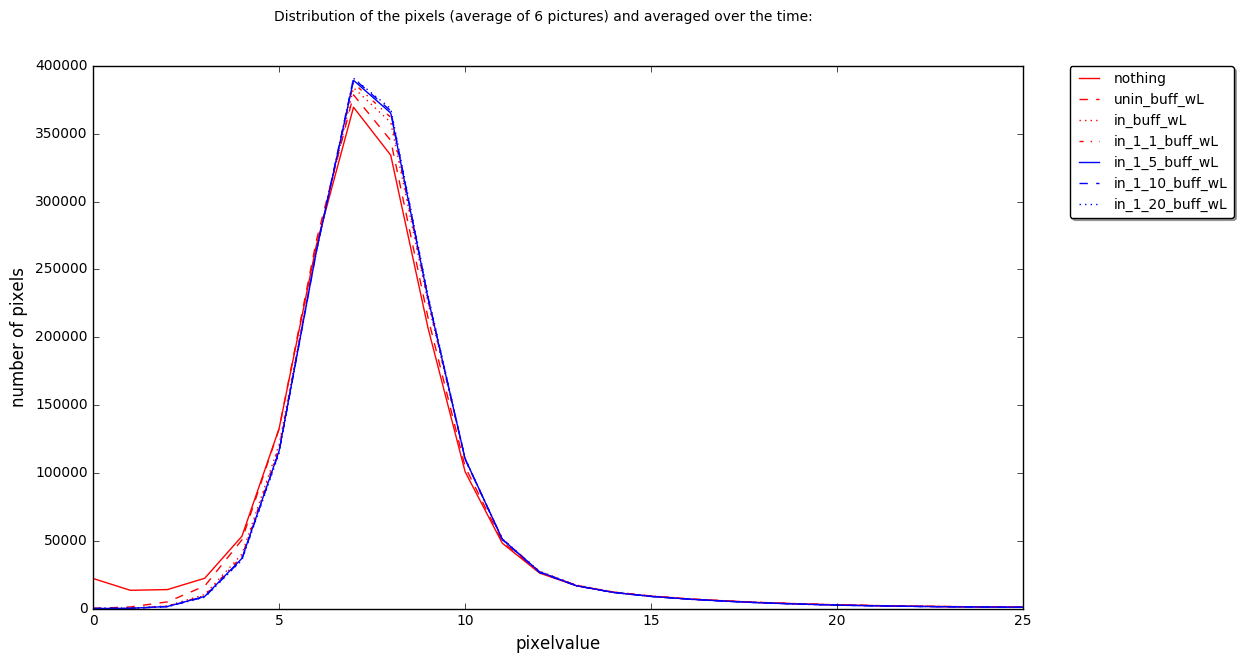

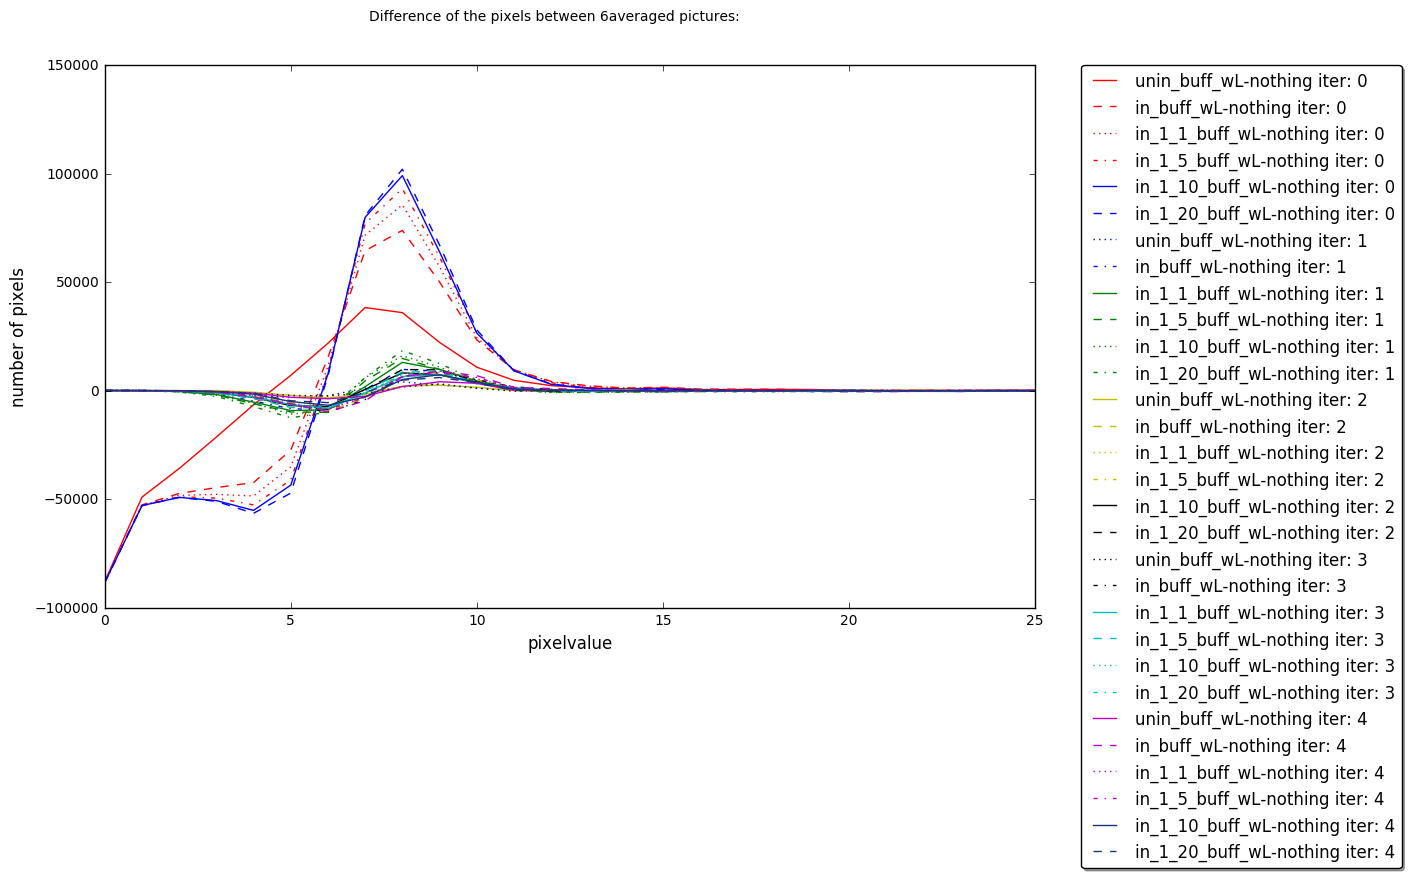

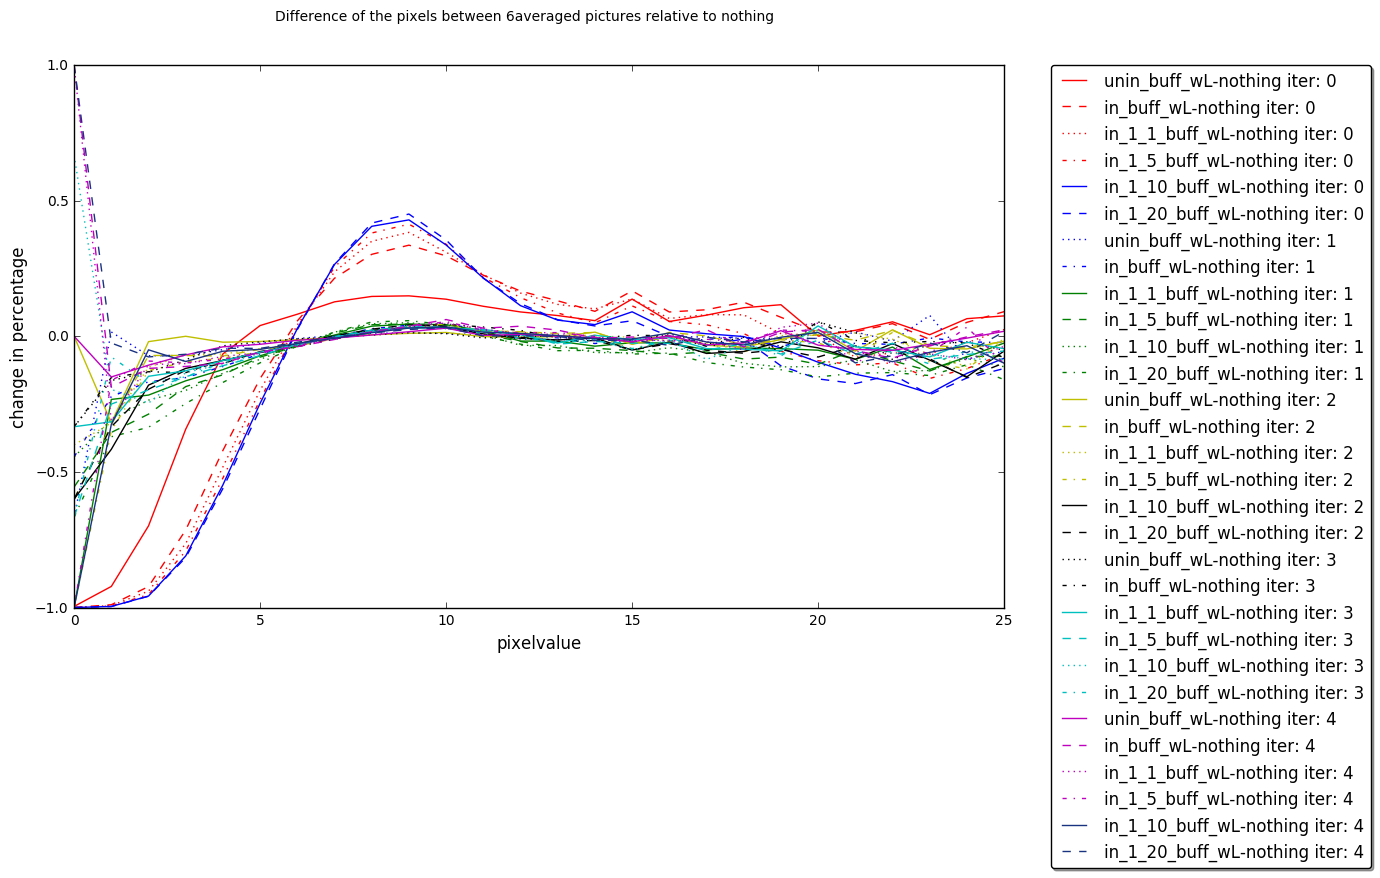

In [19]:
#PRINT "DISTRIBUTION OVER DESIRED VALUES = HISTOGRAM
val_of_interest = np.linspace(0,25,26) 
new_arr = np.zeros((num_files,val_of_interest.size)) 
print val_of_interest 
for i in range(0,num_files): 
    for k in range(0,val_of_interest.size): 
        new_arr[i][k] = (np.mean(pic_arr_int32[i,:,:],axis=0)==val_of_interest[k]).sum()

f13 = plt.figure(figsize=(12,7))
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'r', 'r', 'r','b','b','b','b','g','g','g','g','y','y','y','y','k','k','k','k','c','c','c','c','m','m','m','m',(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9)]) +
    cycler('linestyle', ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.'])))
f13.suptitle('Distribution of the pixels (average of '+str(num_measurements)+ ' pictures) and averaged over the time:')
#PLOTTING HERE -> CHANGES MAYBE NECESSARY!!!
for j in range(0,num_settings):
    plt.plot(val_of_interest,(np.mean(new_arr[j*num_iterations:(j+1)*num_iterations-1,:],axis=0)),label=plot_name[j]) 
plt.ylabel('number of pixels',fontsize=12) 
plt.xlabel('pixelvalue',fontsize=12)
#plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,prop={'size': 10}) plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})
plt.show()

# NEW RELATIVE AND ABSOLUTE PLOT ASSUMING FIRST MEASUREMENT IS ALWAYS NOTING
# first generate the absolute one ;)
f14 = plt.figure(figsize=(12,7))
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'r', 'r', 'r','b','b','b','b','g','g','g','g','y','y','y','y','k','k','k','k','c','c','c','c','m','m','m','m',(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9)]) +
    cycler('linestyle', ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.'])))
f14.suptitle('Difference of the pixels between '+ str(num_measurements) + 'averaged pictures:')
#PLOTTING HERE -> CHANGES MAYBE NECESSARY!!!
for l in range(0,num_iterations):
    for j in range(1,num_settings): #immer referenz zur ersten herstellen!!!
        plt.plot(val_of_interest,(new_arr[j*num_iterations+l,:]-new_arr[0*num_iterations+l,:]),label=(plot_name[j] + '-' + plot_name[0] + ' iter: ' + str(l) )) 
plt.ylabel('number of pixels',fontsize=12) 
plt.xlabel('pixelvalue',fontsize=12)
#plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,prop={'size': 10}) plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 12})
plt.show()

#RELATIVE ONE
f15 = plt.figure(figsize=(12,7))
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'r', 'r', 'r','b','b','b','b','g','g','g','g','y','y','y','y','k','k','k','k','c','c','c','c','m','m','m','m',(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9)]) +
    cycler('linestyle', ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.'])))
f15.suptitle('Difference of the pixels between '+ str(num_measurements) + 'averaged pictures relative to ' + plot_name[0])
#PLOTTING HERE -> CHANGES MAYBE NECESSARY!!!
for l in range(0,num_iterations):
    for j in range(1,num_settings): #immer referenz zur ersten herstellen!!!
        plt.plot(val_of_interest,((new_arr[j*num_iterations+l,:]-new_arr[0*num_iterations+l,:])/new_arr[0*num_iterations+l,:]),label=(plot_name[j] + '-' + plot_name[0] + ' iter: ' + str(l) )) 
plt.ylabel('change in percentage',fontsize=12) 
plt.xlabel('pixelvalue',fontsize=12)
#plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,prop={'size': 10}) plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 12})
plt.show()



pp = PdfPages(des_save_name+'_Histograms.pdf') 
pp.savefig(f13,bbox_inches='tight')
pp.savefig(f14,bbox_inches='tight') 
pp.savefig(f15,bbox_inches='tight') 
pp.close()

[  3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.]


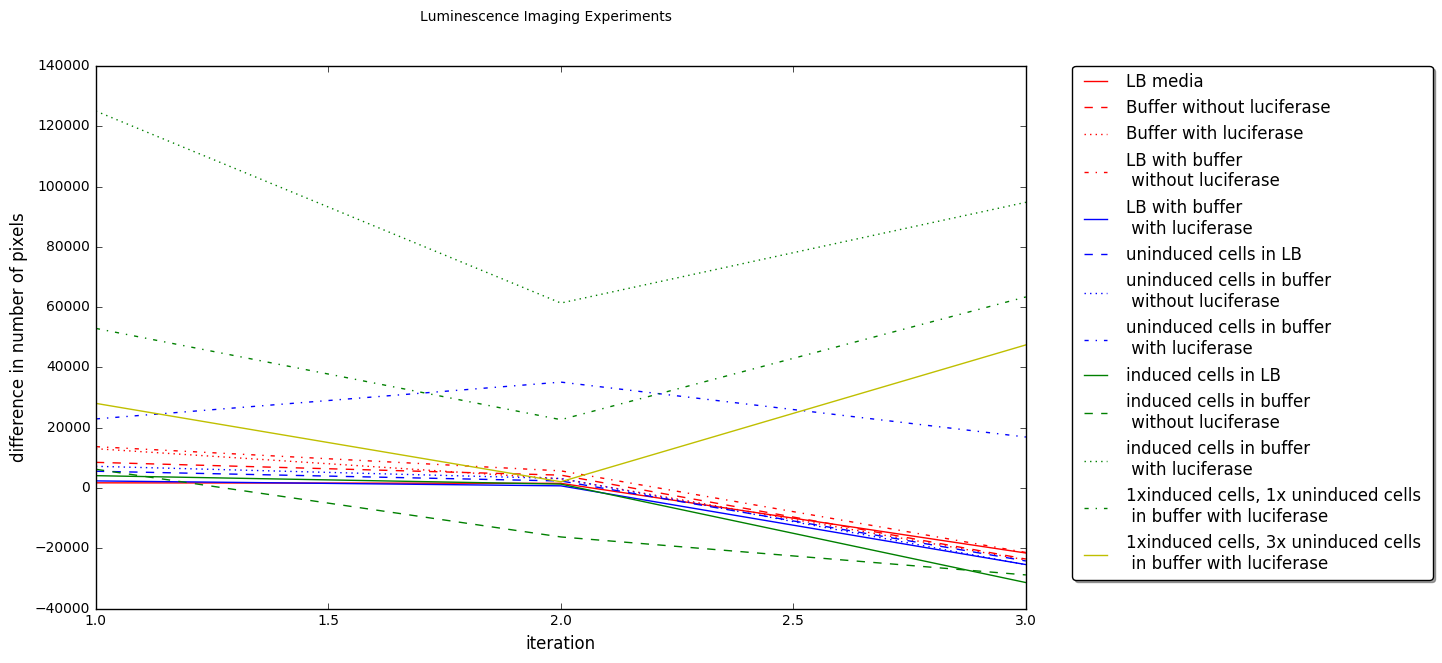

0.0135787857463
0.012227304715
-0.172653700979
0.0679099225897
0.0339949459408
-0.188663553196
0.10405604248
0.0243266585631
-0.190926684153
0.109525942038
0.0453265945877
-0.171230247585
0.0186488388459
0.00560584735462
-0.203305930523
0.0443349753695
0.018520887979
-0.19378158787
0.0574099545774
0.0251023606935
-0.203753758557
0.183137675133
0.280812168127
0.135116115412
0.0325634956177
0.0101481031284
-0.251039600793
0.0494530100441
-0.130022071525
-0.230791376112
1.0
0.490595611285
0.7578929691
0.423301452242
0.181098458192
0.50682138059
0.224401829697
0.0164576802508
0.379566246561


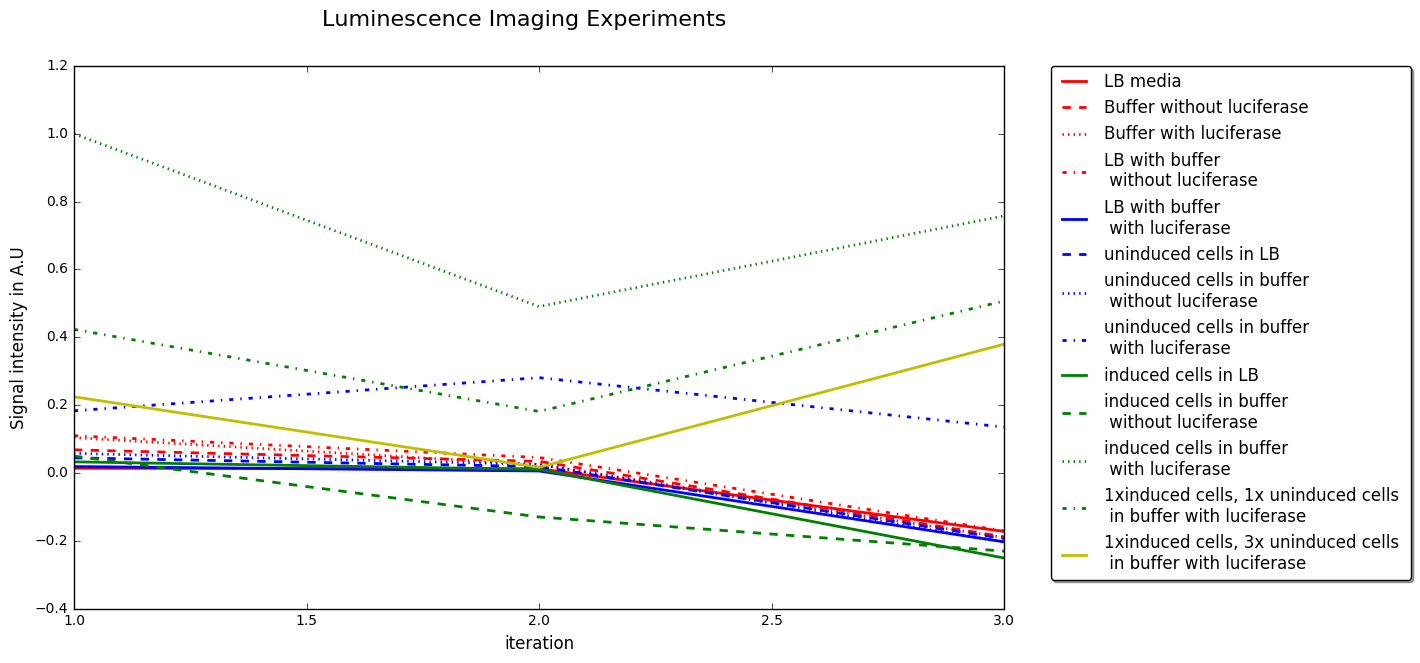

In [5]:
#SIGNAL INTENSITY
val_of_interest = np.linspace(3,14,12) 
new_arr = np.zeros((num_files,val_of_interest.size)) 
print val_of_interest 
for i in range(0,num_files): 
    for k in range(0,val_of_interest.size): 
        new_arr[i][k] = (np.mean(pic_arr_int32[i,:,:],axis=0)==val_of_interest[k]).sum()

# NEW RELATIVE AND ABSOLUTE PLOT ASSUMING FIRST MEASUREMENT IS ALWAYS NOTING
# first generate the absolute one ;)
f14 = plt.figure(figsize=(12,7))
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'r', 'r', 'r','b','b','b','b','g','g','g','g','y','y','y','y','k','k','k','k','c','c','c','c','m','m','m','m',(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9)]) +
    cycler('linestyle', ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.'])))
f14.suptitle('Luminescence Imaging Experiments')
#PLOTTING HERE -> CHANGES MAYBE NECESSARY!!!

val = np.zeros((num_iterations))
#IMPORTANT: MUST SET REFERENCE INDEX TO INDEX OF MAXIMUM SIGNAL MEASUREMENT!
#ASSUMES AT INDEX 0 is reference with least signal!!
#ref_idx = 1 #when using 09_07
ref_idx = 11 #for 09_20
#ref_idx = 2 #for 09_24

reference_val = -1*np.sum(new_arr[ref_idx*num_iterations,0:6]-new_arr[0*num_iterations,0:6])+np.sum(new_arr[ref_idx*num_iterations,6:]-new_arr[0*num_iterations,6:])
iterations = np.linspace(1,num_iterations,num_iterations)
for j in range(1,num_settings): 
    for l in range(0,num_iterations): #immer referenz zur ersten herstellen!!!
        val[l] = -1*np.sum(new_arr[j*num_iterations+l,0:6]-new_arr[0*num_iterations,0:6])+np.sum(new_arr[j*num_iterations+l,6:]-new_arr[0*num_iterations,6:])    
    plt.plot(iterations,val,label=(plot_name[j] )) 
plt.ylabel('difference in number of pixels',fontsize=12) 
plt.xlabel('iteration',fontsize=12)
#plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,prop={'size': 10}) plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 12})
plt.show()

#RELATIVE PLOT -> MAKE SIGNAL OUT OF IT!!
f15 = plt.figure(figsize=(12,7))
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'r', 'r', 'r','b','b','b','b','g','g','g','g','y','y','y','y','k','k','k','k','c','c','c','c','m','m','m','m',(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9)]) +
    cycler('linestyle', ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.'])))
f15.suptitle('Luminescence Imaging Experiments',fontsize=16)
#PLOTTING HERE -> CHANGES MAYBE NECESSARY!!!

val = np.zeros((num_iterations))
#IMPORTANT: MUST SET REFERENCE INDEX TO INDEX OF MAXIMUM SIGNAL MEASUREMENT!
#ASSUMES AT INDEX 0 is reference with least signal!!
iterations = np.linspace(1,num_iterations,num_iterations)
for j in range(1,num_settings): 
    for l in range(0,num_iterations): #immer referenz zur ersten herstellen!!!
        val[l] = (-1*np.sum(new_arr[j*num_iterations+l,0:6]-new_arr[0*num_iterations,0:6])+np.sum(new_arr[j*num_iterations+l,6:]-new_arr[0*num_iterations,6:]))/reference_val    
        print val[l]
    plt.plot(iterations,val,label=(plot_name[j]),linewidth=2) 
plt.ylabel('Signal intensity in A.U',fontsize=12) 
plt.xlabel('iteration',fontsize=12)
#plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,prop={'size': 10}) plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 12})
plt.show()


pp = PdfPages(des_save_name+'_signalIntensity.pdf') 
pp.savefig(f14,bbox_inches='tight') 
pp.savefig(f15,bbox_inches='tight') 
pp.close()

20.958


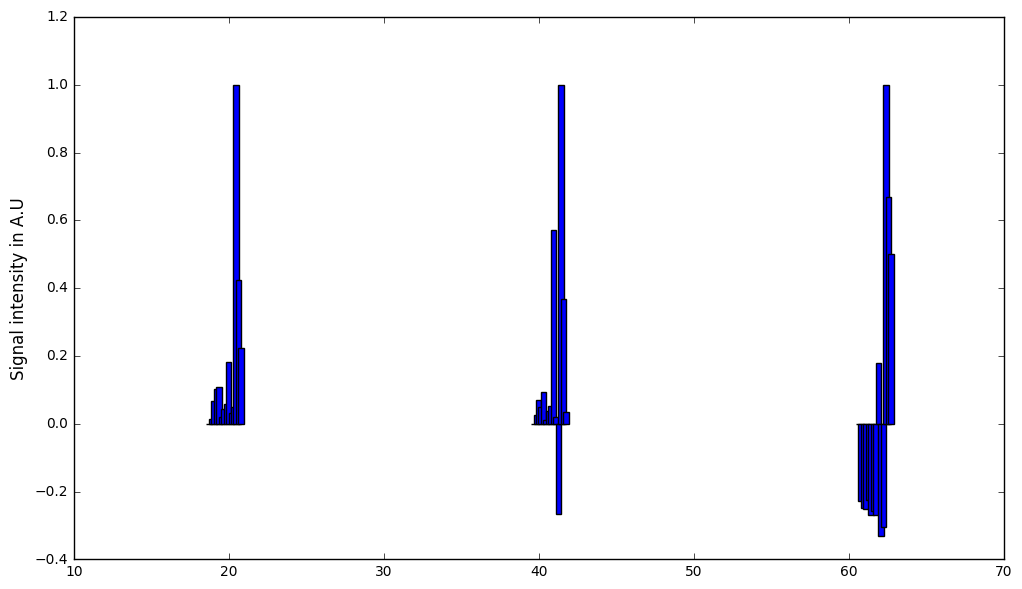

In [57]:
#CREATE BARPLOT:
f16 = plt.figure(figsize=(12,7))
val = np.zeros((num_settings))
ind_ = np.linspace(1,num_settings,num_settings)
ind_ = 0.4*ind
width = 0.35
last = ind_[-1]+width
print last
#IMPORTANT: MUST SET REFERENCE INDEX TO INDEX OF MAXIMUM SIGNAL MEASUREMENT!
#ASSUMES AT INDEX 0 is reference with least signal!!
iterations = np.linspace(1,num_iterations,num_iterations)
for l in range(0,num_iterations):
    ind = l*last + ind_
    for j in range(1,num_settings): 
     #immer referenz zur ersten herstellen!!!
        val[j] = (-1*np.sum(new_arr[j*num_iterations+l,0:6]-new_arr[0*num_iterations,0:6])+np.sum(new_arr[j*num_iterations+l,6:]-new_arr[0*num_iterations,6:]))/reference_val    
    p1 = plt.bar(ind, val, width) 
plt.ylabel('Signal intensity in A.U',fontsize=12) 
#plt.xlabel('iteration',fontsize=12)
#plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,prop={'size': 10}) plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 12})
plt.show()


In [9]:
# HERE GOES A MORE STATISTIC EVALUATION OF THE MEASUREMENT DATA (significance analysis)

print np.shape(pic_arr_int32)
dim = np.shape(pic_arr_int32)

#check if all measurements are filled correctly:
for i in range(0,dim[1]):
    print pic_arr_int32[0,i,:]


mean_of_px = np.zeros((dim[0],dim[2]))
std_dev_of_px = np.zeros((dim[0],dim[2]))
mean_of_img = np.zeros((dim[0]))
std_dev_of_img = np.zeros((dim[0]))
for i in range (0,dim[0]):
    #print i
    mean_of_px[i,:] = np.mean(pic_arr_int32[i,:,:],axis=0)
    std_dev_of_px[i,:] = np.std(pic_arr_int32[i,:,:],axis=0)
    mean_of_img[i] = np.mean(np.sum(pic_arr_int32[i,:,:],axis=1),axis=0)
    std_dev_of_img[i] = np.std(np.sum(pic_arr_int32[i,:,:],axis=1),axis=0)

print "Average mean over all pixels:"
print np.mean(mean_of_px[:,:],axis=1)
print mean_of_img

print "Average standart_deviation over all pixels:"
print np.mean(std_dev_of_px[:,:],axis=1)
print std_dev_of_px[1,:]
print std_dev_of_img


    
    


(30, 6, 10068672)
[ 5  6  9 ..., 12  1  1]
[ 6  5  7 ..., 12  1  1]
[ 5 12  9 ..., 12  1  1]
[ 3 12  7 ..., 12  1  1]
[ 8  9  8 ..., 14  1  1]
[ 6  9 11 ..., 19  1  1]
Average mean over all pixels:
[ 9.70375421  9.70619568  9.70727732  9.70578641  9.70538741  9.74553743
  9.7316138   9.73751183  9.73607901  9.72851354  9.71842788  9.71582091
  9.71486087  9.7154982   9.71680141  9.71204385  9.71142328  9.71300015
  9.70486214  9.71131777  9.70740781  9.71071971  9.7090936   9.7116294
  9.7076787   9.7100231   9.70560644  9.7070427   9.70671756  9.70787126]
[ 97703918.33333333  97728500.66666667  97739391.33333333
  97724379.83333333  97720362.5         98124619.83333333
  97984427.33333333  98043812.66666667  98029386.16666667
  97953211.83333333  97851662.66666667  97825414.          97815747.66666667
  97822164.66666667  97835286.33333333  97787384.          97781135.66666667
  97797012.66666667  97715073.66666667  97780073.33333333
  97740705.16666667  97774051.66666667  97757678.83

nothing
[  1.00000000e+00   6.31428585e-12   6.70065525e-12   7.53087223e-12
   7.27856283e-12]
unin_buff_wL
[  3.59616596e-09   6.42881246e-12   6.49303400e-12   6.56658753e-12
   6.33355699e-12]
in_buff_wL
[  6.48250447e-12   4.28719877e-12   4.80363475e-12   4.66640053e-12
   4.46426637e-12]
in_1_1_buff_wL
[  4.82526388e-12   4.86728048e-12   5.56634604e-12   5.29331336e-12
   4.85753728e-12]
in_1_5_buff_wL
[  5.15372346e-12   5.46446563e-12   5.51306061e-12   5.17313706e-12
   4.86925791e-12]
in_1_10_buff_wL
[  5.50707453e-12   5.59790779e-12   5.82598398e-12   5.51317182e-12
   5.80154152e-12]
in_1_20_buff_wL
[  5.43192994e-12   5.83732467e-12   5.93024484e-12   5.89388493e-12
   6.51633910e-12]


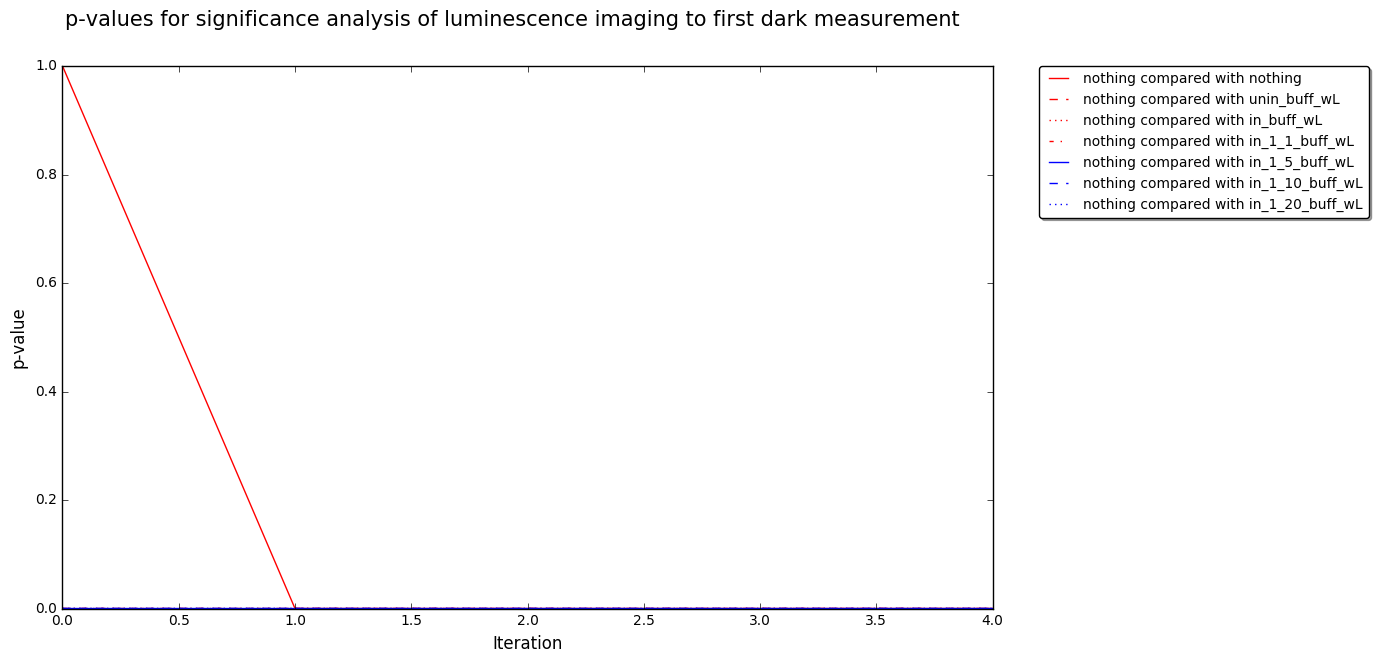

nothing
[  1.00000000e+00   6.31428585e-12   6.70065525e-12   7.53087223e-12
   7.27856283e-12]
unin_buff_wL
[  3.59616596e-09   6.42881246e-12   6.49303400e-12   6.56658753e-12
   6.33355699e-12]
in_buff_wL
[  6.48250447e-12   4.28719877e-12   4.80363475e-12   4.66640053e-12
   4.46426637e-12]
in_1_1_buff_wL
[  4.82526388e-12   4.86728048e-12   5.56634604e-12   5.29331336e-12
   4.85753728e-12]
in_1_5_buff_wL
[  5.15372346e-12   5.46446563e-12   5.51306061e-12   5.17313706e-12
   4.86925791e-12]
in_1_10_buff_wL
[  5.50707453e-12   5.59790779e-12   5.82598398e-12   5.51317182e-12
   5.80154152e-12]
in_1_20_buff_wL
[  5.43192994e-12   5.83732467e-12   5.93024484e-12   5.89388493e-12
   6.51633910e-12]


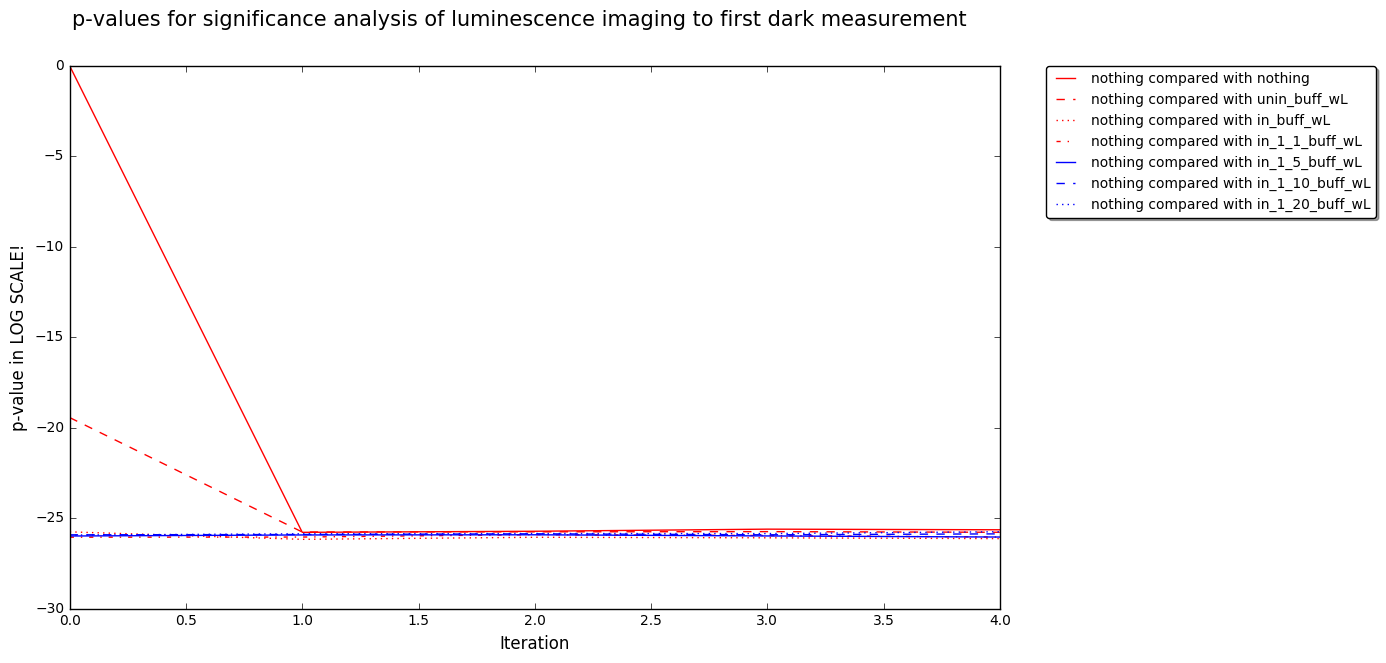

nothing
[  0.         -36.10408505 -35.88878888 -35.46904471 -35.59100051]
unin_buff_wL
[-18.9700883  -36.0387895  -36.00273177 -35.96191309 -36.09300725]
in_buff_wL
[-36.00861672 -37.53920772 -37.11188216 -37.22032204 -37.38660074]
in_1_1_buff_wL
[-37.09510229 -37.06274089 -36.56535102 -36.75097779 -37.07021772]
in_1_5_buff_wL
[-36.84999215 -36.63342161 -36.60078079 -36.8360463  -37.06122543]
in_1_10_buff_wL
[-36.60478447 -36.54454082 -36.39789007 -36.60070645 -36.41330168]
in_1_20_buff_wL
[-36.65545441 -36.39076359 -36.33293972 -36.35544694 -35.98974378]


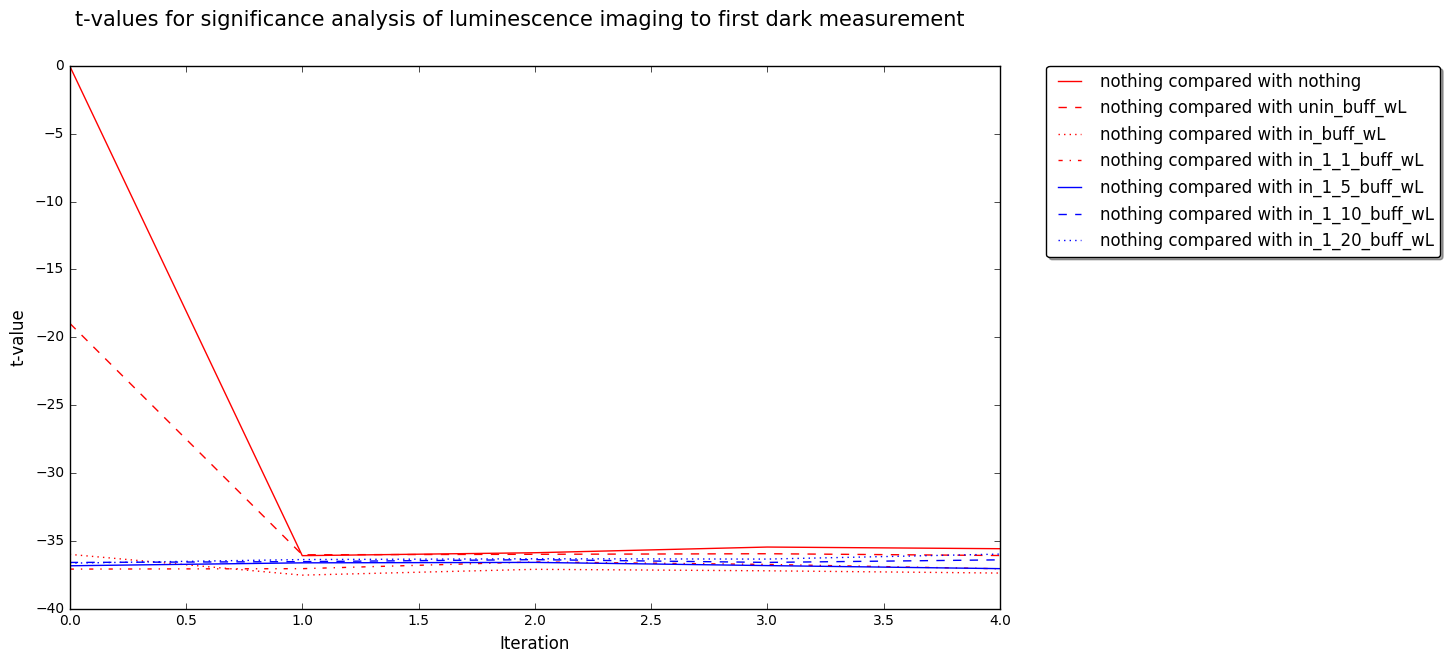

nothing
[  0.         -36.10408505 -35.88878888 -35.46904471 -35.59100051]
unin_buff_wL
[-18.9700883  -36.0387895  -36.00273177 -35.96191309 -36.09300725]
in_buff_wL
[-36.00861672 -37.53920772 -37.11188216 -37.22032204 -37.38660074]
in_1_1_buff_wL
[-37.09510229 -37.06274089 -36.56535102 -36.75097779 -37.07021772]
in_1_5_buff_wL
[-36.84999215 -36.63342161 -36.60078079 -36.8360463  -37.06122543]
in_1_10_buff_wL
[-36.60478447 -36.54454082 -36.39789007 -36.60070645 -36.41330168]
in_1_20_buff_wL
[-36.65545441 -36.39076359 -36.33293972 -36.35544694 -35.98974378]


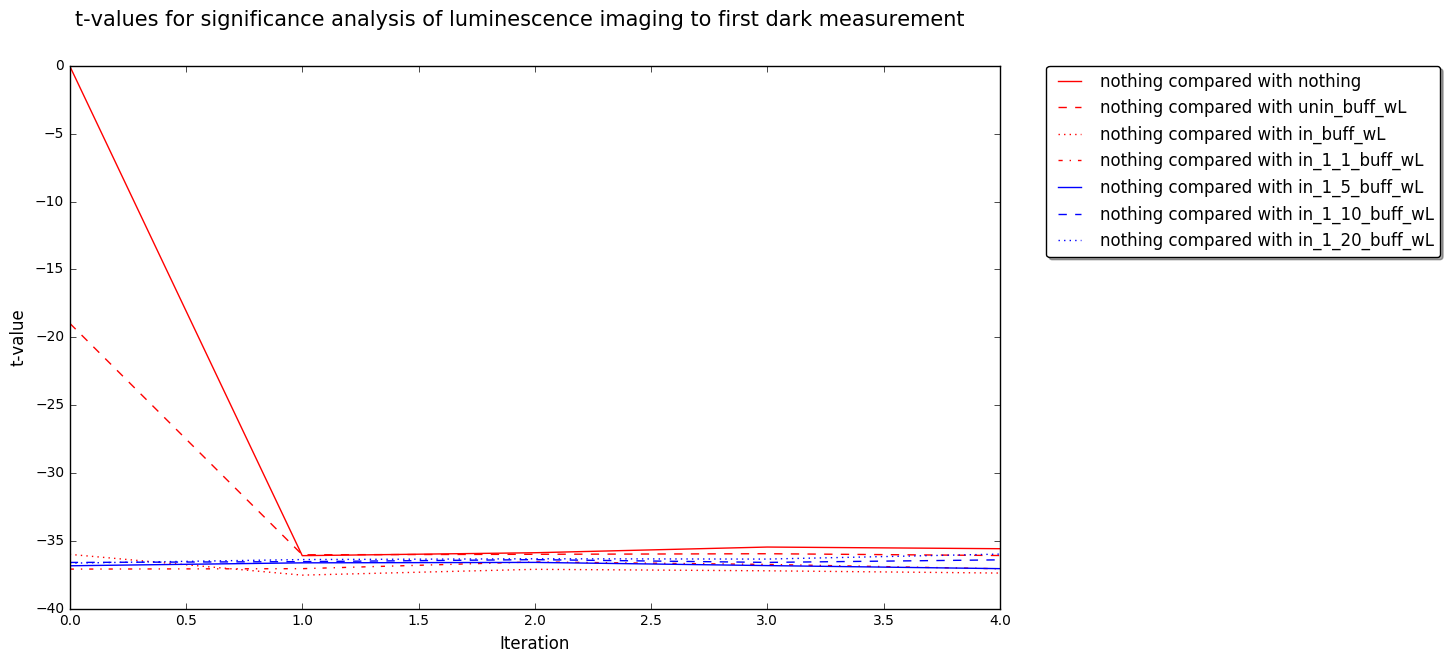

In [38]:
#plot p values!!!

# define the plots up here:
f20 = plt.figure(figsize=(12,7))
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'r', 'r', 'r','b','b','b','b','g','g','g','g','y','y','y','y','k','k','k','k','c','c','c','c','m','m','m','m',(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9)]) +
    cycler('linestyle', ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.'])))
f20.suptitle('p-values for significance analysis of luminescence imaging to first dark measurement',fontsize=15)

for l in range(0,num_settings):
    store_p = np.zeros((num_iterations))
    for j in range(0,num_iterations): #immer referenz zur ersten herstellen!!!
        stat, p = ttest_ind(np.sum(pic_arr_int32[0,:,:],axis=1),np.sum(pic_arr_int32[l*num_iterations+j,:,:],axis=1),axis=0)
        store_p[j] = p
    print plot_name[l]
    print store_p[:]
    plt.plot(store_p[:],label=(plot_name[0] + ' compared with ' + plot_name[l] ) )

plt.ylabel('p-value',fontsize=12) 
plt.xlabel('Iteration',fontsize=12)
#plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,prop={'size': 10}) plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})
plt.show()

f21 = plt.figure(figsize=(12,7))
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'r', 'r', 'r','b','b','b','b','g','g','g','g','y','y','y','y','k','k','k','k','c','c','c','c','m','m','m','m',(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9)]) +
    cycler('linestyle', ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.'])))
f21.suptitle('p-values for significance analysis of luminescence imaging to first dark measurement',fontsize=15)
#PLOTTING HERE -> CHANGES MAYBE NECESSARY!!!

for l in range(0,num_settings):
#for l in range(11,num_settings):
#for l in range(1,2):
    store_p = np.zeros((num_iterations))
    for j in range(0,num_iterations): #immer referenz zur ersten herstellen!!!
        stat, p = ttest_ind(np.sum(pic_arr_int32[0,:,:],axis=1),np.sum(pic_arr_int32[l*num_iterations+j,:,:],axis=1),axis=0)
        store_p[j] = p
    print plot_name[l]
    print store_p[:]
    plt.plot(np.log(store_p[:]),label=(plot_name[0] + ' compared with ' + plot_name[l] ) )

plt.ylabel('p-value in LOG SCALE!',fontsize=12) 
plt.xlabel('Iteration',fontsize=12)
#plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,prop={'size': 10}) plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})
plt.show()


#now also plot the t-values:
f22 = plt.figure(figsize=(12,7))
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'r', 'r', 'r','b','b','b','b','g','g','g','g','y','y','y','y','k','k','k','k','c','c','c','c','m','m','m','m',(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9)]) +
    cycler('linestyle', ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.'])))
f22.suptitle('t-values for significance analysis of luminescence imaging to first dark measurement',fontsize=15)
#PLOTTING HERE -> CHANGES MAYBE NECESSARY!!!

for l in range(0,num_settings):
    store_t = np.zeros((num_iterations))
    for j in range(0,num_iterations): #immer referenz zur ersten herstellen!!!
        stat, p = ttest_ind(np.sum(pic_arr_int32[0,:,:],axis=1),np.sum(pic_arr_int32[l*num_iterations+j,:,:],axis=1),axis=0)
        store_t[j] = stat
    print plot_name[l]
    print store_t[:]
    plt.plot(store_t[:],label=(plot_name[0] + ' compared with ' + plot_name[l] ) )

plt.ylabel('t-value',fontsize=12) 
plt.xlabel('Iteration',fontsize=12)
#plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,prop={'size': 10}) plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 12})
plt.show()

#now also plot the t-values:
f23 = plt.figure(figsize=(12,7))
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'r', 'r', 'r','b','b','b','b','g','g','g','g','y','y','y','y','k','k','k','k','c','c','c','c','m','m','m','m',(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.1, 0.2, 0.5, 0.3),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9),(0.9, 0.2, 0.5, 0.9)]) +
    cycler('linestyle', ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.','-', '--', ':', '-.'])))
f23.suptitle('t-values for significance analysis of luminescence imaging to first dark measurement',fontsize=15)
#PLOTTING HERE -> CHANGES MAYBE NECESSARY!!!

#for l in range(11,num_settings):
#for l in range(1,2):
for l in range(0,num_settings):
    store_t = np.zeros((num_iterations))
    for j in range(0,num_iterations): #immer referenz zur ersten herstellen!!!
        stat, p = ttest_ind(np.sum(pic_arr_int32[0,:,:],axis=1),np.sum(pic_arr_int32[l*num_iterations+j,:,:],axis=1),axis=0)
        store_t[j] = stat
    print plot_name[l]
    print store_t[:]
    plt.plot(store_t[:],label=(plot_name[0] + ' compared with ' + plot_name[l] ) )

plt.ylabel('t-value',fontsize=12) 
plt.xlabel('Iteration',fontsize=12)
#plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,prop={'size': 10}) plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 12})
plt.show()

pp = PdfPages(des_save_name+'_t_test.pdf') 
pp.savefig(f20,bbox_inches='tight')
pp.savefig(f21,bbox_inches='tight') 
pp.savefig(f22,bbox_inches='tight')
pp.savefig(f23,bbox_inches='tight')
pp.close()

In [28]:
#statistical significance analysis on whole image:
for i in range (1,dim[0]):
    stat, p = ttest_ind(np.sum(pic_arr_int32[0,:,:],axis=1),np.sum(pic_arr_int32[i,:,:],axis=1),axis=0)
    print stat
    print "p value"
    print p

# make statistical significance analysis on the whole image -> did not work well!!!
print "Statistical TEST STARTING"
stat_significant_px = np.zeros((dim[0]),dtype=np.float32)

for i in range (1,dim[0]):
    #print i
    stat, p = ttest_ind(pic_arr_int32[0,:,:], pic_arr_int32[i,:,:],axis=0)
    shape_p = np.shape(p)
    print shape_p
    stat_significant_px_ = float(sum(p<0.2))
    print stat_significant_px_
    #print stat_significant_px
    #print shape_p[0]
    percentage = stat_significant_px_/shape_p[0]
    print percentage
    stat_significant_px[i] = percentage


(10068672,)
10066042.0
10068672
0.999738793756


In [ ]:
# General old plot fct which was so far not really used at all since questionable whether those types of plots are needed 
# and reasonable in general,...


## TRYING TO VISUALIZE BIN CHANGES
#eval_pic = np.zeros(height*width,dtype=np.uint8)
#plt.imshow(eval_pic[:].reshape(height,width),cmap='gray')
#plt.show()
##eval_pic[np.logical_and(pic_arr[0][3][:]<10,pic_arr[1][3][:]<20, pic_arr[1][3][:]>9)] = 255
#eval_pic[np.logical_and(pic_arr[0][3][:]<10,pic_arr[1][4][:]>10)] = 255
#plt.imshow(eval_pic[:].reshape(height,width),cmap='gray')
#plt.show()

#im = Image.fromarray(eval_pic[:].reshape(height,width))
#im.save("eval_pic.jpeg")




#specify input data:
num_plots = 5
diff_pic = np.zeros((num_plots,num_pics,height*width),dtype=np.int32)
diff_pic[0][:] = np.array((pic_arr_int32[1][3][:]-pic_arr_int32[0][3][:]),dtype=np.int32) #induced - dark
diff_pic[1][:] = np.array((pic_arr_int32[2][3][:]-pic_arr_int32[0][3][:]),dtype=np.int32) #induced1:2 - dark
diff_pic[2][:] = np.array((pic_arr_int32[3][3][:]-pic_arr_int32[0][3][:]),dtype=np.int32) #induced1:4 - dark
diff_pic[3][:] = np.array((pic_arr_int32[4][3][:]-pic_arr_int32[0][3][:]),dtype=np.int32) #uninduced - dark
diff_pic[4][:] = np.array((pic_arr_int32[5][3][:]-pic_arr_int32[0][3][:]),dtype=np.int32) #water - dark


#val = np.linspace(-15,15,31)
#x = np.linspace(0,15,15)
#my_xticks = ['0']*15

#LESS BINS,...
val = np.linspace(-2,2,5)
x = np.linspace(0,2,2)
my_xticks = ['0']*2


num_pixels_with_val = np.zeros((num_plots,val.size))
#print val
#print val.size
for k in range(0,val.size):
    #print "HALLO"
    for j in range(0,num_plots):
        num_pixels_with_val[j][k]=(diff_pic[j]==val[k]).sum()


f11 = plt.figure(figsize=(12,7))
#f11 = plt.figure(figsize=(60,20))
#PLOTTING HERE -> CHANGES MAYBE NECESSARY!!!
plt.plot(val[:],num_pixels_with_val[0][:],label='induced - dark')
plt.plot(val[:],num_pixels_with_val[1][:],label='induced1:2 - dark')
plt.plot(val[:],num_pixels_with_val[2][:],label='induced1:4 - dark')
plt.plot(val[:],num_pixels_with_val[3][:],label='uninduced - dark')
plt.plot(val[:],num_pixels_with_val[4][:],label='water - dark')

plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,prop={'size': 10})

f11.suptitle(bin_size_string + ' delta in pixel values and frequency',fontsize=15)
plt.xlabel('delta in pix value', fontsize=12)
plt.ylabel('how often this delta appeared',fontsize=12)

plt.show()    



diff_num_pixels_with_val = np.zeros((num_plots,val.size/2))
for k in range(0,val.size/2):
    #print "HALLO"
    if (k%2==0):
        my_xticks[k] = str(val[k]) + '-' + str(val[val.size-k-1])
    else:
        my_xticks[k] = ''
    for j in range(0,num_plots):   
        diff_num_pixels_with_val[j][k]=num_pixels_with_val[j][k]-num_pixels_with_val[j][val.size-k-1]    



f12 = plt.figure(figsize=(12,7))

f12.suptitle(bin_size_string + ' delta in pixel values and frequency',fontsize=15)
plt.xticks(x, my_xticks[::-1])
#PLOTTING HERE -> CHANGES MAYBE NECESSARY!!!

plt.plot(x, np.flipud(diff_num_pixels_with_val[0][:]),label='induced - dark')
plt.plot(x, np.flipud(diff_num_pixels_with_val[1][:]),label='induced1:2 - dark')
plt.plot(x, np.flipud(diff_num_pixels_with_val[2][:]),label='induced1:4 - dark')
plt.plot(x, np.flipud(diff_num_pixels_with_val[3][:]),label='uninduced - dark')
plt.plot(x, np.flipud(diff_num_pixels_with_val[4][:]),label='water - dark')

plt.ylabel('how often this delta appeared',fontsize=12)

#plt.legend(loc='best', ncol=2, shadow=True, fancybox=True,prop={'size': 10})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,borderaxespad=0., shadow=True, fancybox=True,prop={'size': 10})

plt.show()

#NEW BINNING
val_of_interest = np.linspace(0,20,21)



pp = PdfPages('foo1.pdf')
pp.savefig(f11,bbox_inches='tight')
pp.savefig(f12,bbox_inches='tight')
pp.close()